# Mohammad.E.Asadolahi@gmail.com
# https://github.com/MohammadAsadolahi
Evolutionary_Sterategy-for-solving-OpenAi-Gym-LunarLander-v2  
https://github.com/A-GAH/Gradient-Free-Reinforcement-Learning-solving-Openai-gym-LunarLanderV2-by-Evolution-Strategy/


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import numpy as np
import torch as T

In [2]:
!pip3 install box2d-py
!pip3 install gym[Box_2D]

     |████████████████████████████████| 448 kB 14.8 MB/s 


In [11]:
import time
env = gym.make('LunarLander-v2')

In [4]:
class NN(T.nn.Module):
    def __init__(self,inputDims=1,output=1):
        super().__init__()
        self.layers=T.nn.ModuleList()
        self.layers.append(T.nn.Linear(inputDims,256))
        self.layers.append(T.nn.Linear(256,output))
    def state2Value(self,X):
        o=T.tensor(X,dtype=T.float)
        for i in self.layers:
            o=i(o)
        return np.argmax(o.detach().numpy())
    def setWeights(self,weights):
      with T.no_grad(): 
        self.layers[0].weight=T.nn.parameter.Parameter(weights[:(self.layers[0].weight).view(-1).shape[0]].reshape(self.layers[0].weight.shape))
        self.layers[1].weight=T.nn.parameter.Parameter(weights[(self.layers[0].weight).view(-1).shape[0]:].reshape(self.layers[1].weight.shape))
    def getWeights(self):
      return T.cat((self.layers[0].weight.reshape(-1),self.layers[1].weight.reshape(-1)),0)

In [12]:
nn=NN(env.observation_space.shape[0],env.action_space.n)

generation: 0 Average Reward: -538.583251953125 Best reward:-156.47698974609375
generation: 1 Average Reward: -316.5377197265625 Best reward:-63.06631851196289
generation: 2 Average Reward: -215.0087432861328 Best reward:-75.97962188720703
generation: 3 Average Reward: -155.26268005371094 Best reward:-83.45104217529297
generation: 4 Average Reward: -134.10035705566406 Best reward:-23.528057098388672
generation: 5 Average Reward: -146.13290405273438 Best reward:-63.603675842285156
generation: 6 Average Reward: -118.82445526123047 Best reward:-56.470787048339844
generation: 7 Average Reward: -120.94194030761719 Best reward:0.8265160918235779
generation: 8 Average Reward: -124.09735107421875 Best reward:-58.74011993408203
generation: 9 Average Reward: -108.97384643554688 Best reward:-42.318382263183594
generation: 10 Average Reward: -121.54873657226562 Best reward:9.485918998718262
generation: 11 Average Reward: -100.96890258789062 Best reward:-43.67923355102539
generation: 12 Average Rew

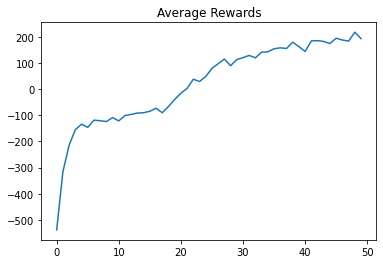

In [13]:
def runEvolution(rewardFunction,populationSize,generationSize,sigma,lr,NN):
  parameters=NN.getWeights()
  rewards=[]
  for g in range(generationSize):
    noise=T.randn(populationSize,parameters.shape[0])
    springs=noise*sigma
    reward=T.zeros(populationSize)
    for i in range(populationSize):
      spring=parameters+springs[i]
      NN.setWeights(spring)
      reward[i]=rewardFunction(NN)
    rewards.append(reward.mean())
    advantage=(reward-reward.mean())/reward.std()
    # print(T.matmul(noise.T,advantage))
    parameters=parameters+lr/(populationSize*sigma)*T.matmul(noise.T,advantage)
    print(f"generation: {g} Average Reward: {reward.mean()} Best reward:{max(reward)}")
    lr *= 0.992354
  return parameters,rewards
def rewardFunction(NN):
  totalRewards=[]
  for i in range(10):
    done=False
    state=env.reset()
    rewards=0
    while not done:
      action=NN.state2Value(state)
      nextState,reward,done,info=env.step(action)
      rewards+=reward
      state=nextState
    totalRewards.append(rewards)
  return sum(totalRewards)/len(totalRewards)
parameters,rewards=runEvolution(rewardFunction,populationSize=50,generationSize=50,sigma=0.1,lr=0.03,NN=nn)
plt.title(f'Average Rewards')
plt.plot(rewards)
plt.savefig("Average Rewards",dpi=200)